In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("College Data.csv")
df.head()

,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count
0,College 52,UK,27002,2593,11644,10.00,3574250,Physics,Swimming,39,100.00,655
1,College 93,Switzerland,11913,9392,2521,6.95,762556,Chemical Engineering,Athletics,31,68.84,256
2,College 15,Japan,15644,5475,4388,9.33,1795845,Business Administration,Volleyball,37,91.99,555
3,College 72,Singapore,13239,7363,5876,8.68,1222223,Physics,Tennis,48,97.98,455
4,College 61,Canada,10236,13339,-3103,8.56,1921133,Biotechnology,Athletics,34,83.56,310


In [3]:
df["CGPA"] = df["CGPA"].round(2)
df.to_csv("College Data.csv",index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   College ID                 50000 non-null  object 
 1   Country                    50000 non-null  object 
 2   Total Students             50000 non-null  int64  
 3   Male                       50000 non-null  int64  
 4   Female                     50000 non-null  int64  
 5   CGPA                       50000 non-null  float64
 6   Annual Family Income       50000 non-null  int64  
 7   Branch                     50000 non-null  object 
 8   Sports                     50000 non-null  object 
 9   Research Papers Published  50000 non-null  int64  
 10  Placement Rate             50000 non-null  float64
 11  Faculty Count              50000 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 4.6+ MB


In [5]:
df.describe()

,Total Students,Male,Female,CGPA,Annual Family Income,Research Papers Published,Placement Rate,Faculty Count
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,15522.357440,7747.061900,3555.550780,8.705294,2.611606e+06,24.472300,82.335352,428.919520
std,8366.792001,4188.406336,5892.297104,1.053365,1.387889e+06,14.458858,11.475691,154.733223
min,1001.000000,500.000000,-13917.000000,4.000000,2.000040e+05,0.000000,60.000000,62.000000
25%,8272.750000,4111.000000,527.000000,7.980000,1.408786e+06,12.000000,72.450000,315.000000
50%,15506.500000,7756.000000,3744.000000,8.810000,2.620902e+06,24.000000,82.460000,428.000000
75%,22768.250000,11360.000000,7786.000000,9.650000,3.811208e+06,37.000000,92.470000,544.000000
max,29999.000000,14999.000000,14999.000000,10.000000,4.999988e+06,49.000000,100.000000,796.000000


In [6]:
df.isnull().sum()

College ID                   0
Country                      0
Total Students               0
Male                         0
Female                       0
CGPA                         0
Annual Family Income         0
Branch                       0
Sports                       0
Research Papers Published    0
Placement Rate               0
Faculty Count                0
dtype: int64

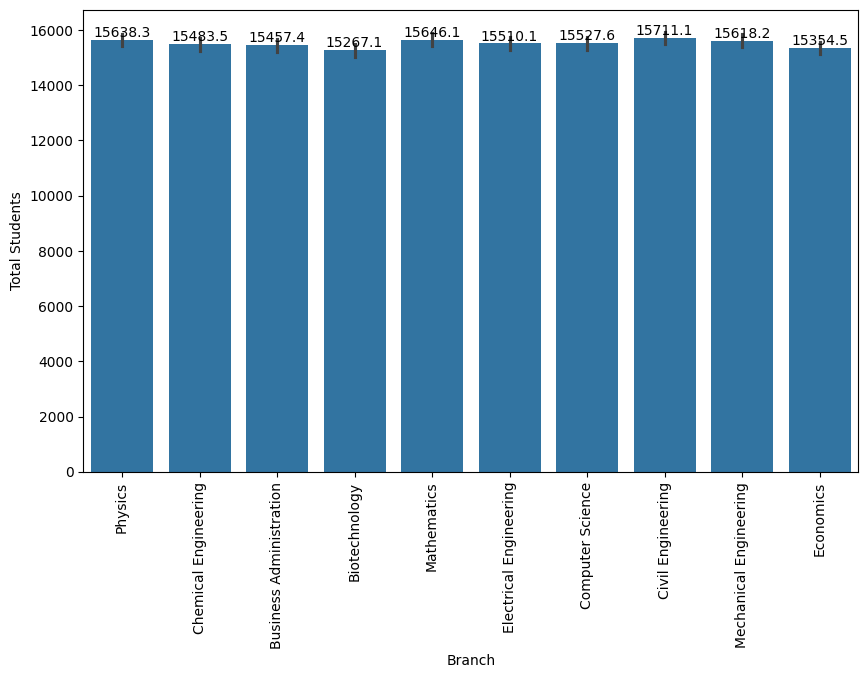

In [7]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x="Branch", y="Total Students", data=df)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

#Most students in the branch of Civil Engineering and lowest students in the branch of Biotechnology

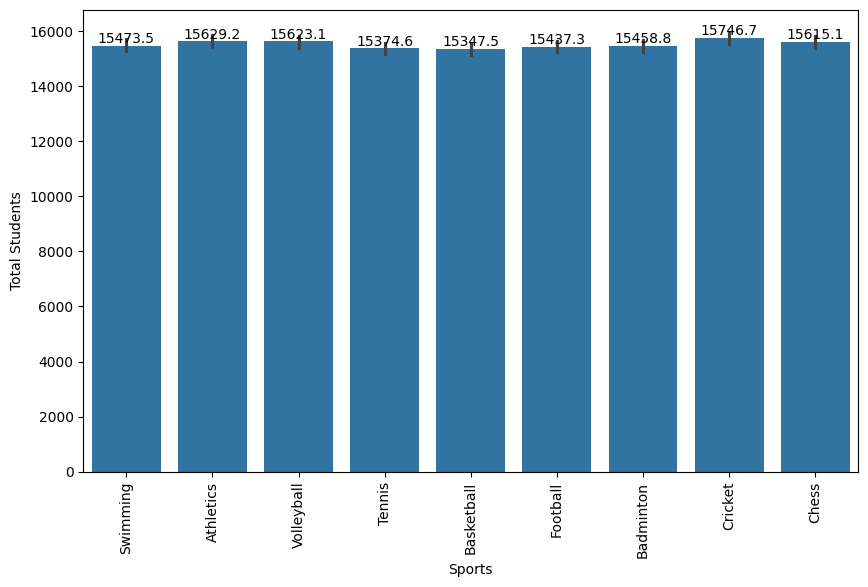

In [8]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x="Sports", y="Total Students", data=df)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

#Most students in the branch of Cricket and lowest students in the branch of Basketball

# Plot histograms for each numerical feature

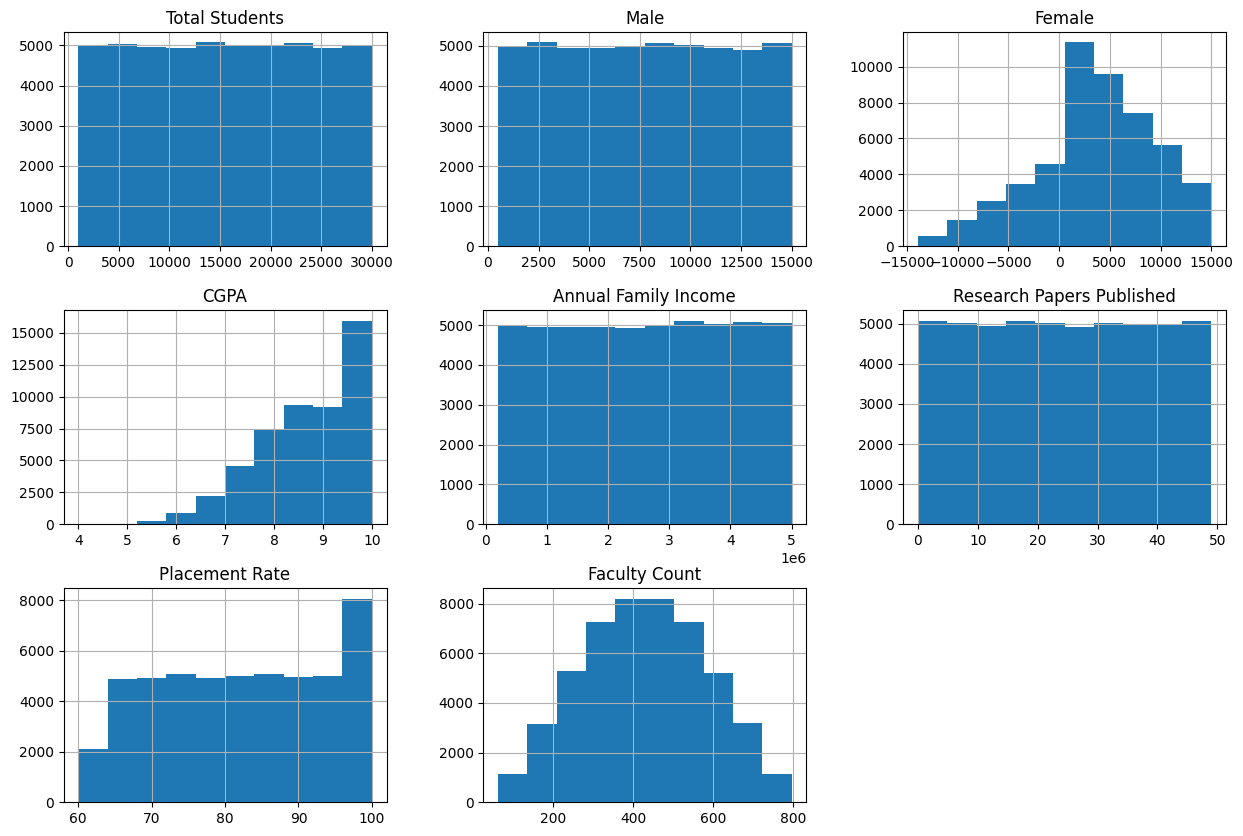

In [9]:
df.hist(bins=10, figsize=(15, 10))
plt.show()

# Define numerical and categorical columns

In [10]:
sns.set(style="whitegrid")

numerical_cols = ["Total Students", "Male", "Female", "CGPA", "Annual Family Income", 
                  "Research Papers Published", "Placement Rate", "Faculty Count"]
categorical_cols = ["Country", "Branch", "Sports"]

# Create subplots for numerical feature distributions

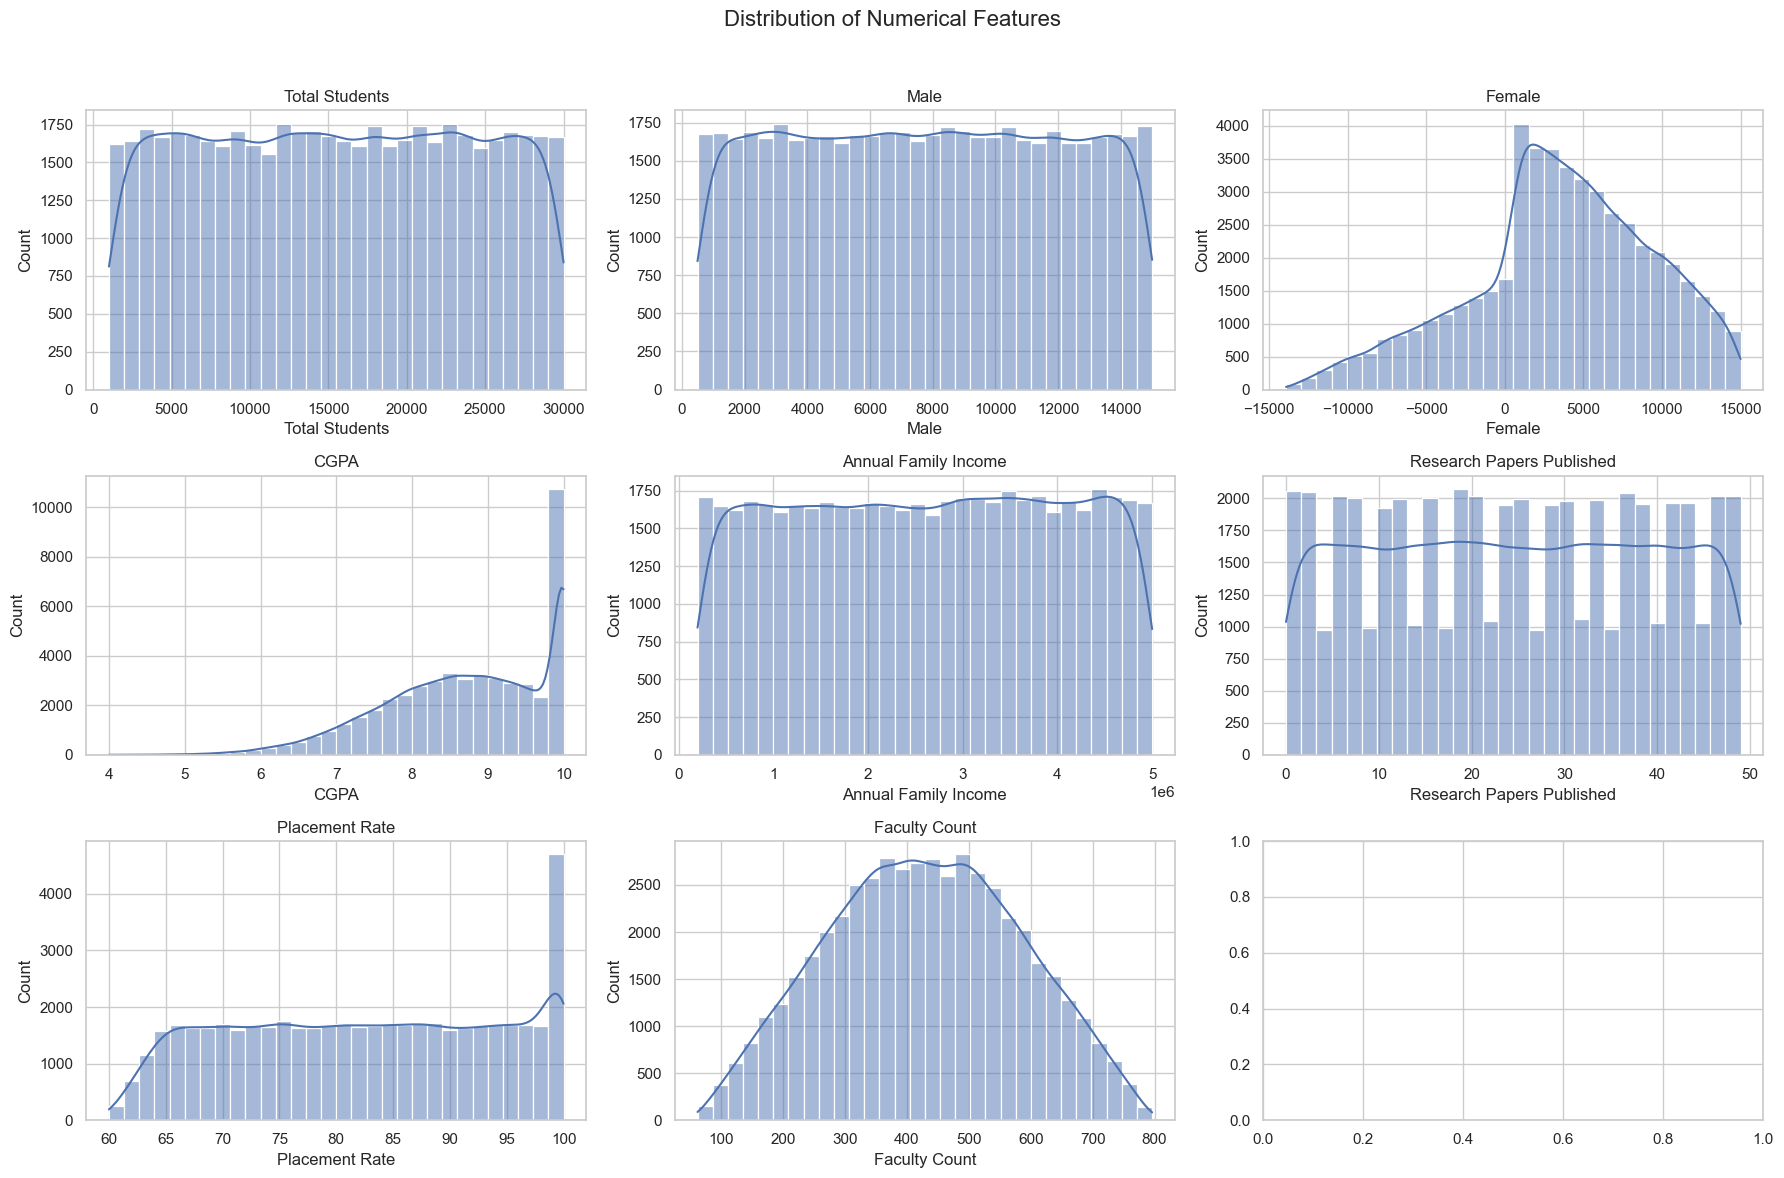

In [11]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle("Distribution of Numerical Features", fontsize=16)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Generate Correlation Heatmap

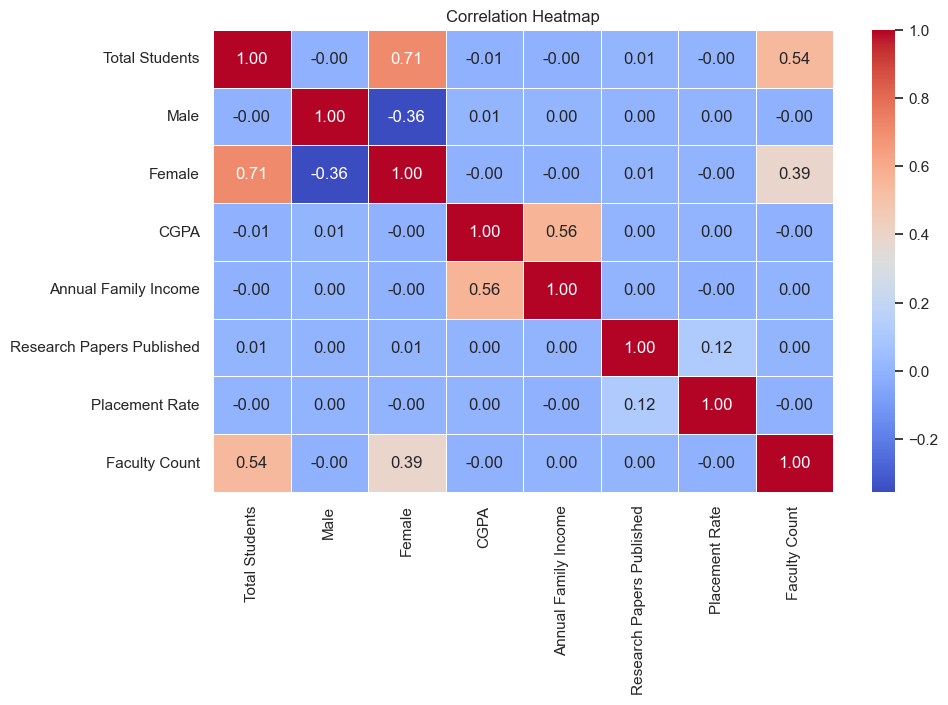

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Generate Boxplots for Outlier Detection

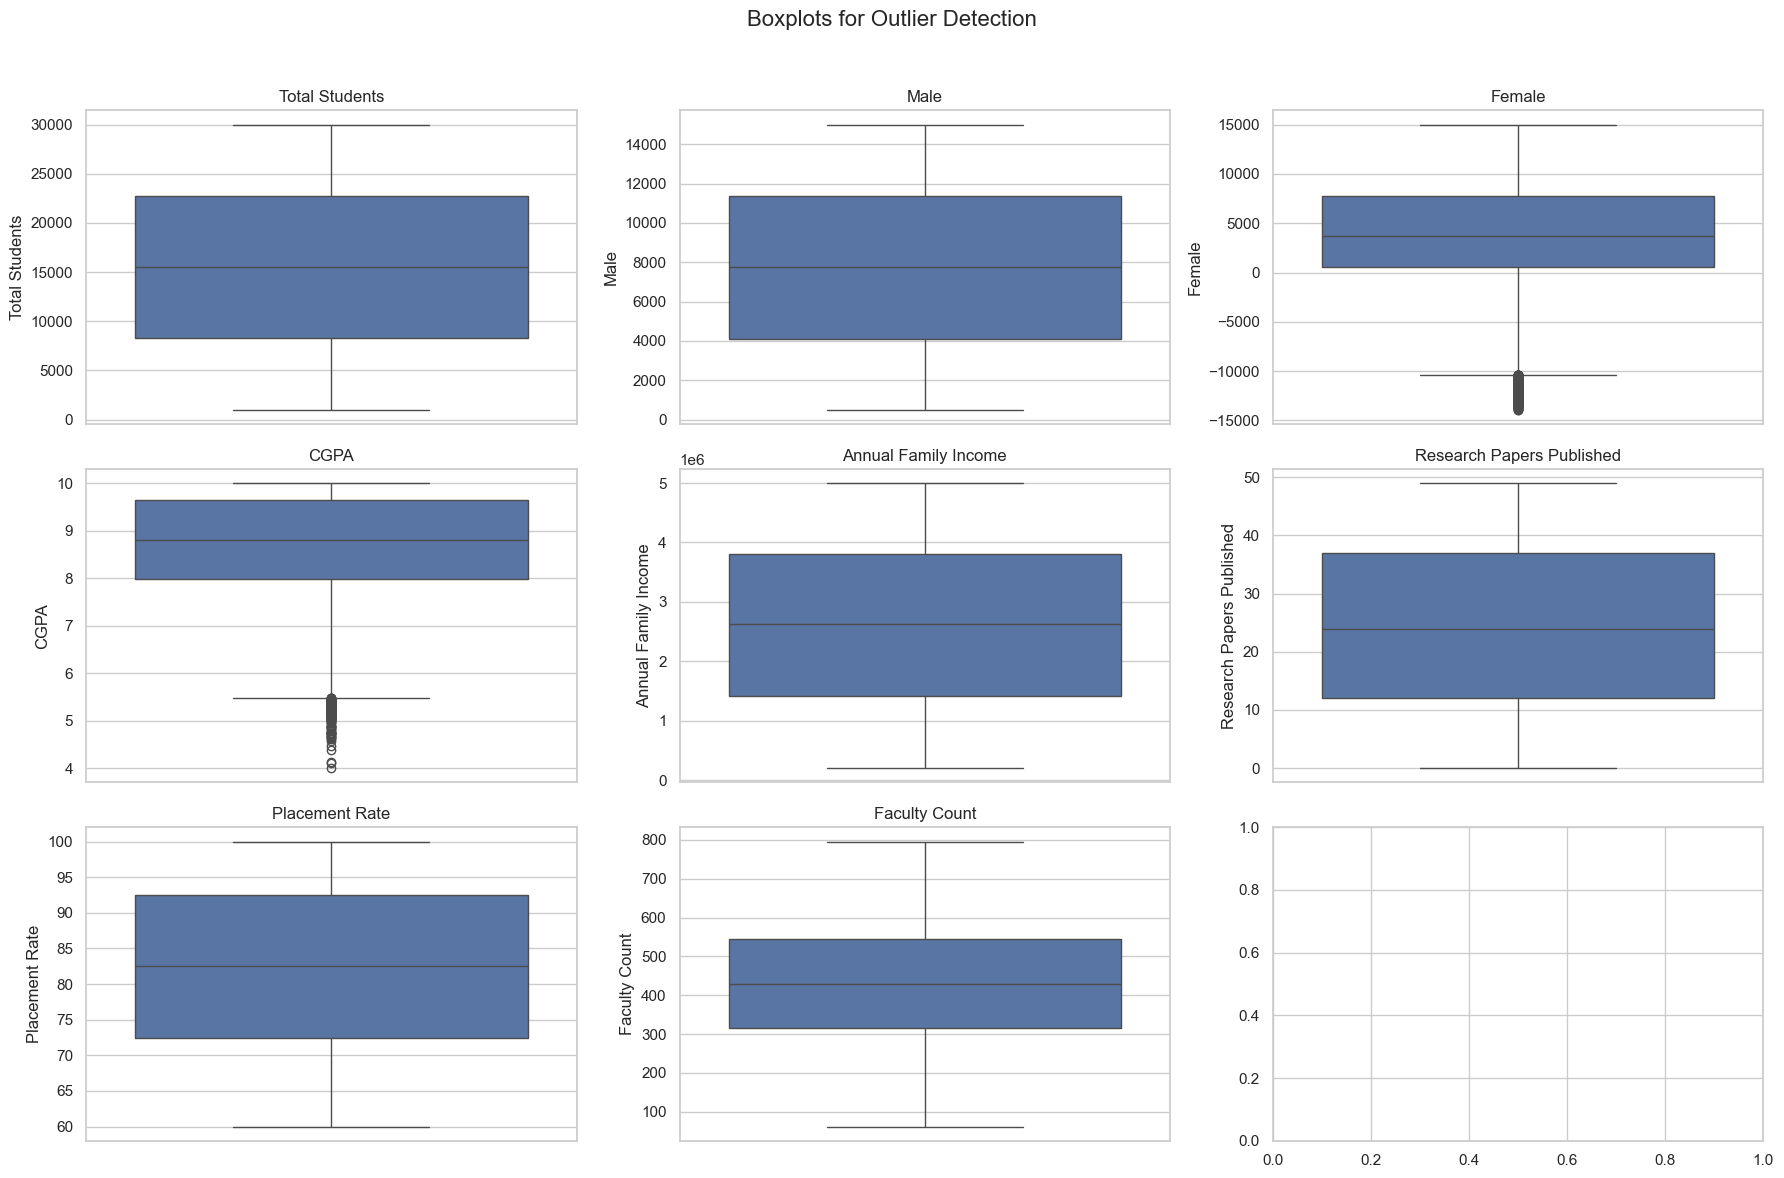

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle("Boxplots for Outlier Detection", fontsize=16)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Count Plots for Categorical Features

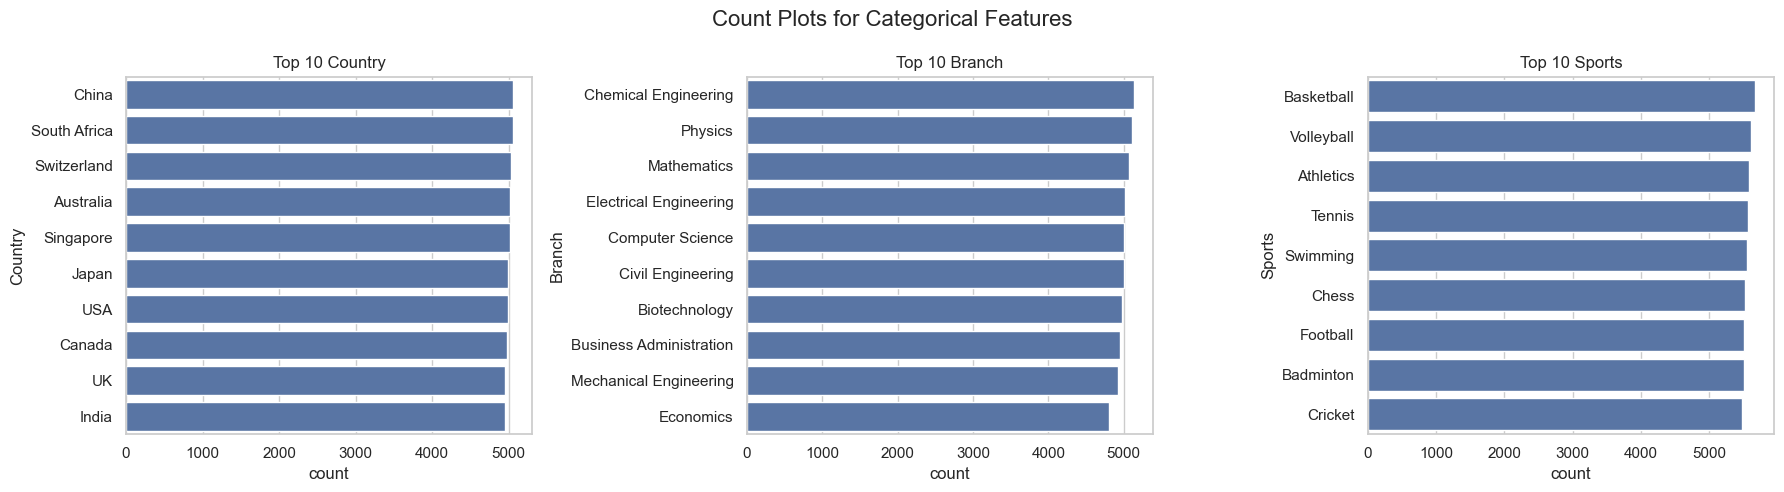

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Count Plots for Categorical Features", fontsize=16)

for i, col in enumerate(categorical_cols):
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10], ax=axes[i])  # Show top 10 categories
    axes[i].set_title(f"Top 10 {col}")

plt.tight_layout()
plt.show()